<a href="https://colab.research.google.com/github/jbigwi/BSD-project/blob/main/TimeSeries_JABO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()
#data= pd.read_excel('icbt_data.xlsx', sheet_name="data", parse_dates=True)

Saving icbt_data.xlsx to icbt_data.xlsx


In [4]:
import io
xlsx_file = io.BytesIO(uploaded.get('icbt_data.xlsx'))
data = pd.read_excel(xlsx_file, 'data')

In [5]:
# checking for NaN value 
data.isnull().values.any()

False

In [6]:
data['Product'].value_counts()

1021    22652
1031    12493
3007    12385
1043    11247
7001    11040
        ...  
6005        2
3028        2
3006        1
2030        1
2010        1
Name: Product, Length: 183, dtype: int64

New dataset for Irish potato

In [7]:
df = data[data['Product']==1021]
df.shape #THis is to comfirm the shape of my dataset

(22652, 18)

In [8]:
df_original =df.copy()

In [9]:
df['Time'] = pd.to_datetime(df.Time, format = '%d-%m-%Y %H:%M')
df_original['Time'] = pd.to_datetime(df.Time, format = '%d-%m-%Y %H:%M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
for i in (df,df_original):
    i['year'] = i.Time.dt.year
    i['month'] = i.Time.dt.month
    i['week'] = i.Time.dt.week
    i['day']= i.Time.dt.day
    i['Hour']=i.Time.dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the

In [11]:
df['Day of week'] =df['Time'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = df['Time'].apply(applyer)
df['weekend'] = temp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No handles with labels found to put in legend.


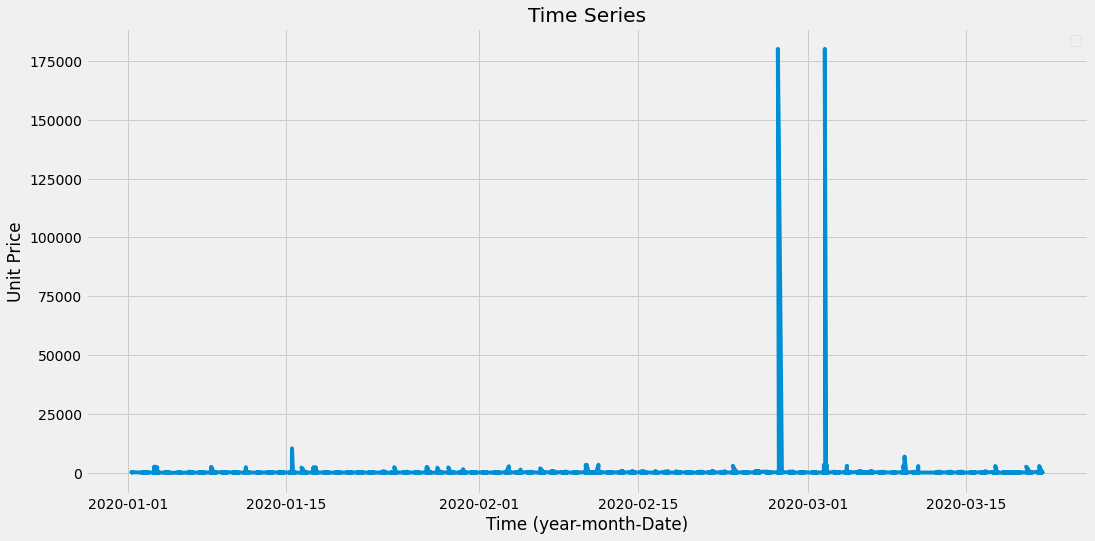

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

df.index = df['Time']
ts = df['Unit price']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month-Date)")
plt.ylabel("Unit Price")
plt.legend(loc = 'best')

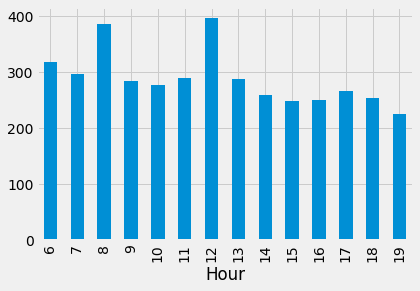

In [15]:
df.groupby('Hour')['Unit price'].mean().plot.bar()

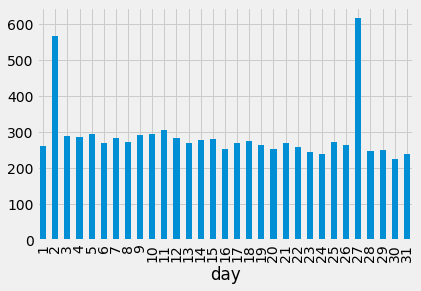

In [17]:
df.groupby('day') ['Unit price'].mean().plot.bar()

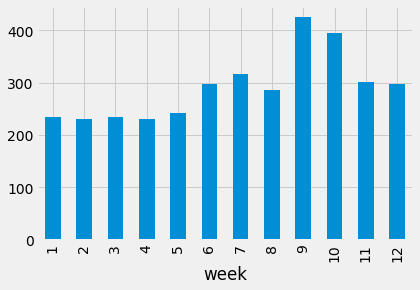

In [18]:
df.groupby('week')['Unit price'].mean().plot.bar()

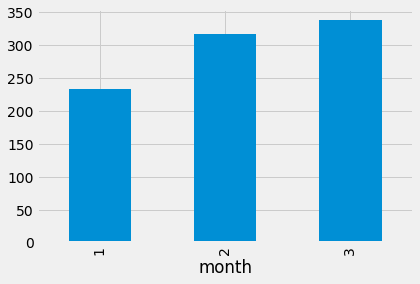

In [19]:
df.groupby('month')['Unit price'].mean().plot.bar()

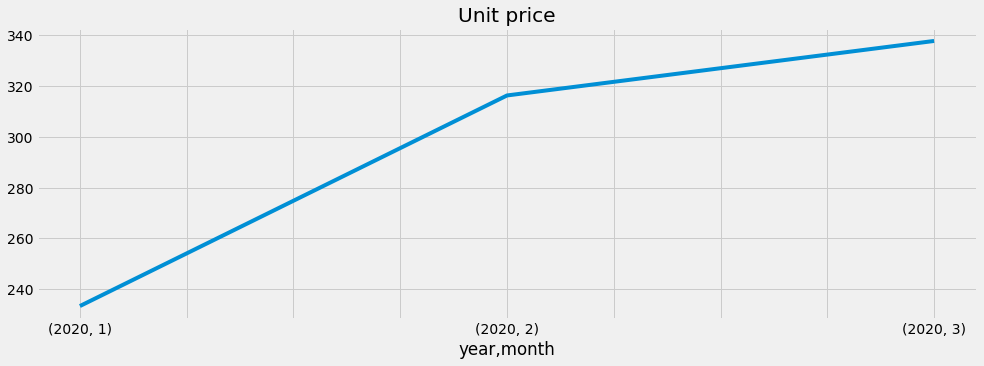

In [20]:
temp = df.groupby(['year', 'month'])['Unit price'].mean()
temp.plot(figsize =(15,5), title = "Unit price", fontsize = 14)

In [23]:
df['Count']= df['Unit price']

In [24]:
df.Timestamp = pd.to_datetime(df.Time, format = '%d-%m-%y %H:%M')
df.index = df.Timestamp

#Hourly
hourly = df.resample('H').mean()

#Daily
daily = df.resample('D').mean()

#Weekly
weekly = df.resample('W').mean()

#Monthly
monthly = df.resample('M').mean()

d)Performing Exploratory Analysis, identify data issues, suggest, and apply appropriate solutions to deal with them.  

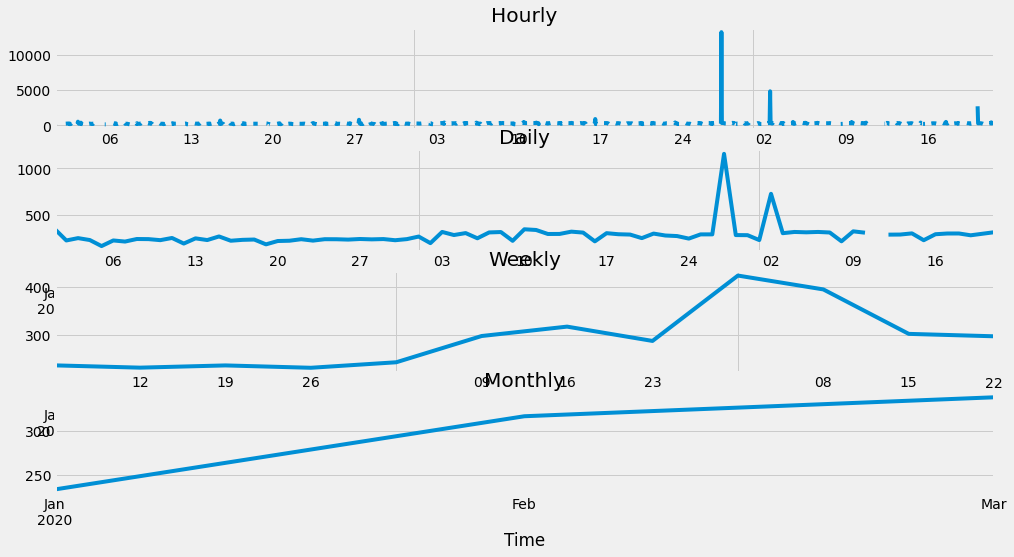

In [25]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

My solution to the above issue of Missing data, I used Linear interpolation for day and Hours as they are the ones that had that problem

In [26]:
hourly =hourly.interpolate(method ='linear', limit_direction ='forward') 
daily = daily.interpolate(method ='linear', limit_direction ='forward') 

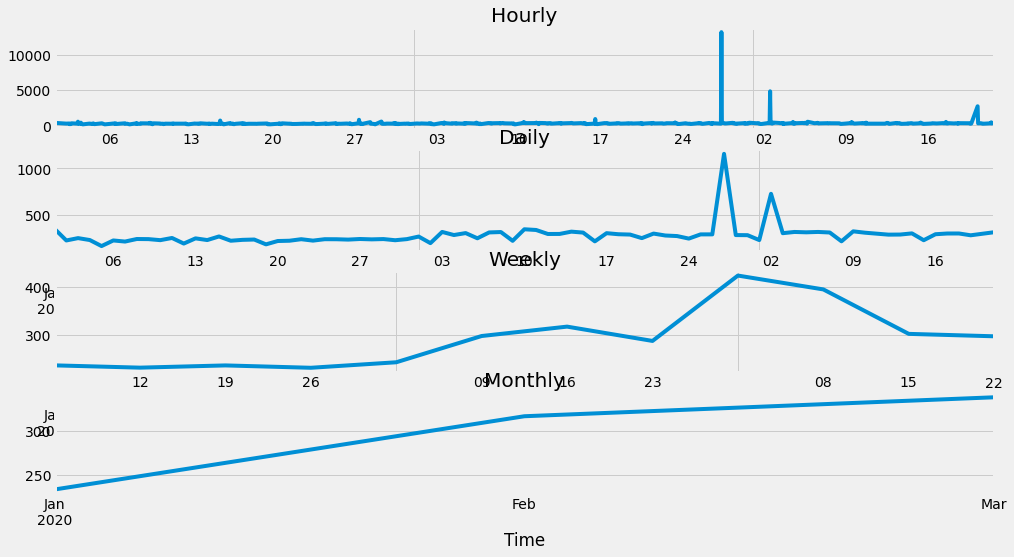

In [27]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])